In [1]:
import jax
import numpyro
import numpy as np
import matplotlib.pyplot as plt
from numpyro.infer import HMC, NUTS, MCMC

def quad(x):
    return 0.5 * jax.numpy.dot(x,x)

In [2]:
x=np.array([1.0,0.5])

kernel = NUTS(potential_fn=quad, step_size=0.1)
mcmc = MCMC(kernel, num_warmup=0, num_samples=10000, num_chains=1)
rng_key = jax.random.PRNGKey(0)
mcmc.run(rng_key, init_params=x, extra_fields=('potential_energy',))

sample: 100%|██████████| 10000/10000 [00:09<00:00, 1041.46it/s, 31 steps of size 1.00e-01. acc. prob=1.00]


In [3]:
samples = mcmc.get_samples()
samples

DeviceArray([[-1.2334093 , -0.00713078],
             [-0.89881617,  0.71260077],
             [ 0.17239521,  0.32458037],
             ...,
             [-1.6051775 ,  1.9655392 ],
             [-1.6311241 ,  1.9208019 ],
             [-0.29073796,  1.4826255 ]], dtype=float32)

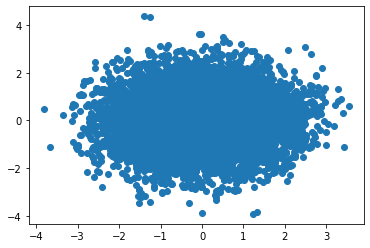

In [4]:
np.savetxt('samples.txt', samples)

plt.scatter(x=samples[:,0], y=samples[:,1])